# Fire up graphlab create

In [1]:
import graphlab

# Load some house sales data

In [4]:
sales = graphlab.SFrame('home_data.gl/')

In [7]:
sales.head(3)

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 3

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 7129300520 | 2014-10-13 00:00:00+00:00 | 221900 |    3     |     1     |     1180    |
| 6414100192 | 2014-12-09 00:00:00+00:00 | 538000 |    3     |    2.25   |     2570    |
| 5631500400 | 2015-02-25 00:00:00+00:00 | 180000 |    2     |     1     |     770     |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5650   |   1    |     0      |  0   |     3     |   7   |    1180    |       0       |
|   7242   |   2    |     0      |  0   |     3     |   7   |    2170    |      400      |
|  10000   |   1    |     0      |  0   |     3     |   6   |    770     |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1955   |      0       |  98178  | 47.51123398 | -122.25677536 |     1340.0    | ... |
|   1951   |     1991     |  98125  | 47.72102274 |  -122.3188624 |     1690.0    | ... |
|   1933   |      0       |  98028  | 47.73792661 | -122.23319601 |     2720.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[3 rows x 21 columns]

# Exploring data for housing sales

In [9]:
sales.show(view = "Scatter Plot", x = "sqft_living", y = "price")

Canvas is updated and available in a tab in the default browser.


# Create a simple regression model of sqft_living to price

In [35]:
train_data,test_data = sales.random_split(.8, seed = 0)

# Build the regression model

In [36]:
sqft_model = graphlab.linear_regression.create(train_data, target = 'price', features = ['sqft_living'])

Linear regression:

--------------------------------------------------------

Number of examples          : 16565

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.014002     | 4322210.195267     | 1602995.419528       | 264764.884612 | 223265.297651   |

SUCCESS: Optimal solution found.

# Evaluate the model

In [37]:
sqft_model

Class                         : LinearRegression

Schema
------
Number of coefficients        : 2
Number of examples            : 16565
Number of feature columns     : 1
Number of unpacked features   : 1

Hyperparameters
---------------
L1 penalty                    : 0.0
L2 penalty                    : 0.01

Training Summary
----------------
Solver                        : newton
Solver iterations             : 1
Solver status                 : SUCCESS: Optimal solution found.
Training time (sec)           : 0.022

Settings
--------
Residual sum of squares       : 1.16121385691e+15
Training RMSE                 : 264764.8846

Highest Positive Coefficients
-----------------------------
sqft_living                   : 284.5956

Lowest Negative Coefficients
----------------------------
(intercept)                   : -51586.9126

In [38]:
print test_data['price'].mean()

543054.042563


In [39]:
print sqft_model.evaluate(test_data)

{'max_error': 4121936.644175443, 'rmse': 255248.30268733678}


# Let's show what our predictions look like

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

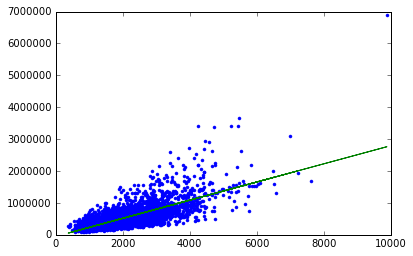

In [45]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
         test_data['sqft_living'],sqft_model.predict(test_data),'-')

In [47]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-51586.9125576,5068.57148586
sqft_living,None,284.595578198,2.22754811545


# Exploring other features

In [58]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [60]:
sales[my_features].head()

bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
3,1,1180,5650,1,98178
3,2.25,2570,7242,2,98125
2,1,770,10000,1,98028
4,3,1960,5000,1,98136
3,2,1680,8080,1,98074
4,4.5,5420,101930,1,98053
3,2.25,1715,6819,2,98003
3,1.5,1060,9711,1,98198
3,1,1780,7470,1,98146
3,2.5,1890,6560,2,98038


In [61]:
sales[my_features].show()

Canvas is updated and available in a tab in the default browser.


In [134]:
sales.show(view = "BoxWhisker Plot", x = "zipcode", y = "price")

Canvas is updated and available in a tab in the default browser.


# Build a regression model with more features

In [67]:
my_features_model = graphlab.linear_regression.create(train_data, target = 'price', features = my_features)

Linear regression:

--------------------------------------------------------

Number of examples          : 16447

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.021000     | 2562958.796222     | 5400364.104639       | 177837.992133 | 276933.987508   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



In [68]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [70]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4121936.644175443, 'rmse': 255248.30268733678}
{'max_error': 3565913.1734093414, 'rmse': 180449.99640978515}


# Apply learned models to predict prices of 3 houses

In [79]:
house1 = sales[sales['id']=='5309101200']

In [83]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [84]:
house1['price']

dtype: int
Rows: ?
[620000L, ... ]

In [86]:
print sqft_model.predict(house1)

[631442.4751185231]


In [88]:
print my_features_model.predict(house1)

#So, in this case sqft model performs better than my_features model

[720118.4439639853]


In [89]:
house2 = sales[sales['id']== "1925069082"]

In [90]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [94]:
print house2['price']
print sqft_model.predict(house2)
print my_features_model.predict(house2)

[2200000L]
[1268936.5702829445]
[1471388.1780386036]


## Last house, super fancy

In [95]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [97]:
type(bill_gates)

dict

In [100]:
print sqft_model.predict(graphlab.SFrame(bill_gates))
print my_features_model.predict(graphlab.SFrame(bill_gates))

[14178191.997362476]
[13520236.562169246]


In [140]:
sales[sales['zipcode']=='98039']['price'].mean()

2160606.5999999996

In [165]:
sales.column_names()
sales1 = sales[(sales['sqft_living']<4000) & (sales['sqft_living']>2000)]

In [170]:
a = sales1.num_rows()
b = sales.num_rows()

In [180]:
float(1.0*a/b)

0.4215518437977143

In [183]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'condition',
 'grade',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [186]:
advaced_features_model = graphlab.linear_regression.create(train_data, target = 'price', features = advanced_features)

Linear regression:

--------------------------------------------------------

Number of examples          : 16532

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.201005     | 3445105.309896     | 1215940.124036       | 154764.755059 | 152478.912269   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



In [195]:
rmse1 = my_features_model.evaluate(test_data)['rmse']

In [194]:
rmse2 = advaced_features_model.evaluate(test_data)['rmse']

In [198]:
rmse1-rmse2

22984.274165484414